The following module defines the parameters of the code

In [2]:
import helper_functions_Q1 as hlp
import declare as dcl
import utils as utl

The goal of this project is to help the service business operations lead plan and staff service centers efficiently to meet incoming service demands from different regions. In this project, two service centers and two regions are considered with the following assumptions:

Each service center provides two types of services: pre delivery and post delivery services. pre-delivery services are for new vehicles and post delivery services are for used cars.
- **Pre-delivery Service demand volumes**: Pre-delivery service demands for 2023 on a monthly basis is given. The assumption here is that the predelivery services are known and deterministic. 


**Note**: The volume of pre-delivery services for Service Center 1 is consistently recorded for odd months only. This regularity suggests that the absence of data for alternate months is not due to missing information but reflects the actual schedule of deliveries. As such, I assumed these values are not missing. If in the future the data collection process changes or if receive data of service center 1 doesn't fit this pattern, an appropriat imputation techniques such as mean/median, KNN, or last observation carried forward (LOCF) techniques should be implemented.

- **Post-delivery Service demand volumes**: Post delivery service arrivals is random and the arrival rate of post-delivery services in a month has a mean of 0.25 and the variance of 0.2

The duration of each service types is random. The following information is provided:
- **Pre-delivery Service duration**: Pre-delivery service duration follows a Gaussian distribution with a mean of 2 hours and a variance of 1 hour.
- **Post-delivery Service Duration**: A historical data for 71 post-delivery events is provided.

The rest of the given assumptions are as follows:

- Customers who needs services go to the nearest service center based on distance.
- There's no maximum throughput for service centers, but the company seeks to avoid an infinite number of service technicians, aiming for an efficient staffing plan.
- Each technician can work up to 168 hours per month and can process one vehicle at a time.

**Note**:
In addition to mentioned assumptions, we make the following assumptions:

- Service demand requests are revealed at the beginning of each month.
- The duration of pre-delivery and post-delivery services are independent of each other.


**Note**
In addition to the mentioned assumptions, we make the following assumptions:

- All service requests are revealed at the beginning of each month.
- 

## 1. Determining service demands and service time durations at each service center:

#### a. Estimating Monthly Service Demands

Each service center provides two types of services: pre-delivery and post-delivery. When it comes to staff planning and scheduling, the volume of service demands and the duration of services demands both matter. 
  
**Pre-delivery Service Volumes:**
Pre-delivery services are required for new cars. The delivered vehicle volume to each region in 2023 is given. We assume all delivered vehicles require pre-delivery services by the closest service center. We then calculate the monthly pre-delivery service demand volumes as follows:


In [2]:
service_centers_monthly_volumes_df,_=hlp.calculate_service_centers_monthly_delivered_volume(dcl.service_center_delivered_df)
service_centers_monthly_volumes_df

,Date,Service Center,Month,Total Delivered Volume
0,2023-01-01,Service Center 1,1,50.0
2,2023-02-01,Service Center 1,2,0.0
4,2023-03-01,Service Center 1,3,50.0
6,2023-04-01,Service Center 1,4,0.0
8,2023-05-01,Service Center 1,5,50.0
10,2023-06-01,Service Center 1,6,0.0
12,2023-07-01,Service Center 1,7,50.0
14,2023-08-01,Service Center 1,8,0.0
16,2023-09-01,Service Center 1,9,50.0
18,2023-10-01,Service Center 1,10,0.0


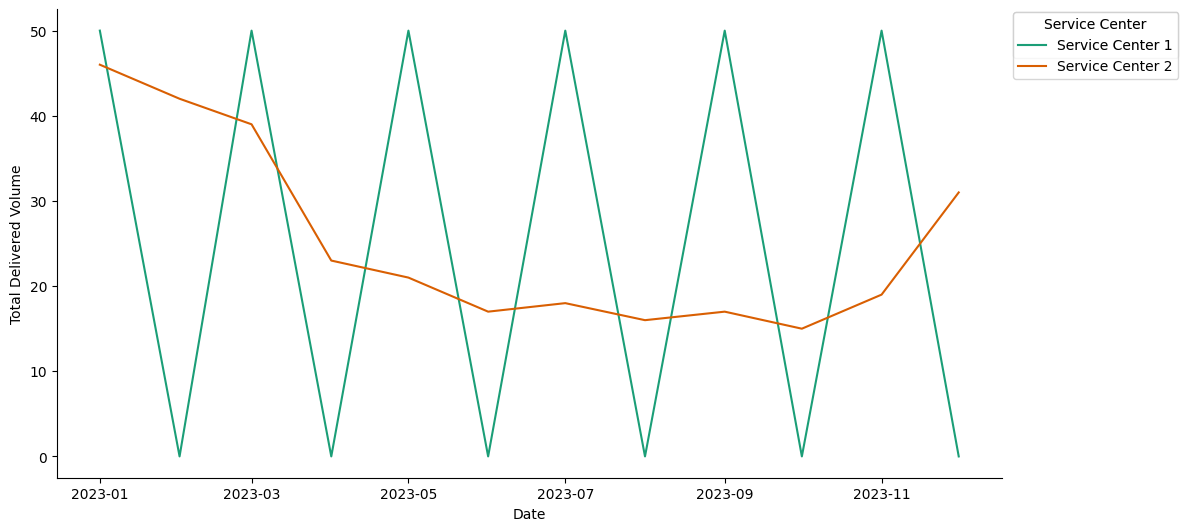

**Post-delivery Service Volumes**

The arrival rate of post-delivery service requests are stochastic and random with a mean of 0.25 a month and a variance of 0.2. The relationship between the mean and variance suggests that the variability of in the arrival of post-delivery events is not increasing in the same rate as their means. In addition, the arrival rate of vehicles for post-delivery services depend on the number of vehicles that goes through the pre-delivery services and are on the road. This adds another layer of complexity in estimating the distribution of this stochastic process. The described relation doesn't directly match any typical distribution parameters but indicates a process with inherent variability. As no specific distribution is mentioned, we consider the following assumptions and provide two possible approaches to estimate the post-delivery vehicle volumes distributions:
 * We assume no vehicles are on the road at the beginning of month $1-2023$.
 * All pre-delivery requests are processed and fulfilled within the same month. If this is not the case in reality, one may consider the stochasticity of fulfilled pre-delivery service requests when estimating the post-delivery arrivals. 
 
 Given these assumptions, we can model the arrival rate of vehicles for post delivery services each month with:

1. **Conway–Maxwell–Poisson (CMP) Distribution:** Usually Poisson distribution is used to model the number of events occurring within a fixed interval of time or space, under the assumption that these events happen with a known constant mean rate $\lambda$ and independently of the time since the last event. These assumptions seem to fall short for the post-delivery service arrivals at these service centers as the variane is not equal to the mean of arrivals. As such,  describing the post-delivery arrivals with the Conway–Maxwell–Poisson (CMP) distribution seems appropriate to address this under-dispersion characteristic (variance<mean). 
The Conway–Maxwell–Poisson (CMP) distribution is a generalization of the Poisson distribution that includes an additional parameter to model an under-dispersion relative to the Poisson distribution. The parameter \(\nu\) of this distribution control the dispersion, where \(\nu > 1\) models under-dispersion.


 2. **Bernouli Distribution:** With some degree of approximations, we can describe the post-delivery arrival rates using a Bernouli distribuiton with a parameter $p=0.25$. The variance of this distribution would be $p*(1-p)=0.1875$, closely matching the specified $0.2$.
 
 In this analysis, we opt the second option. Let us denote the number of pre-delivery requests, delivered vehicles to customers, at month $t$ by $n_t$. We define a random variable $D(t)$ as the number of post-delivery service requests at the beginning of month t, for $t>1$. Then:
 $$D(t)=\sum_{t^{'}=1}^{t-1}p*n_t$$


**Pre-delivery Service Durations:**

Based on the given assumptions, pre-delivery service duration of each vehicle follows a Gaussian distribution with an average of $\mu=2$ hours and a variance of $\delta^2=1$. 

**Note**:
* We assume the duration of pre-delivery services within a month are independent of each other.
* We assume number of pre-delivery service requests are known and deterministic.

 
For a single vehicle, if $X$ represents the service duration following a normal distribution $X \sim \mathcal{N}(2, 1)$, then for $n_t$ vehicles, the sum of these service durations would follow a normal distribution with a mean of $2n_t$ and a variance of $n^2_t$. 

To be more specific, since the service durations cannot be negatice, $X$ follows a normal distribution, but truncated at zero. 

**Post-delivery Service Durations**

The specific distribution for post-delivery service durations is not provided. In addition, post delivery service durations are provided in integer numbers. The histogram suggests a non-normal, discrete distribution. Goodness-of-fits tests such as the Kolmogorov-Smirnov test, Chi-square test, or Anderson-Darling test, can quantitatively evaluate the fit of different distributions.

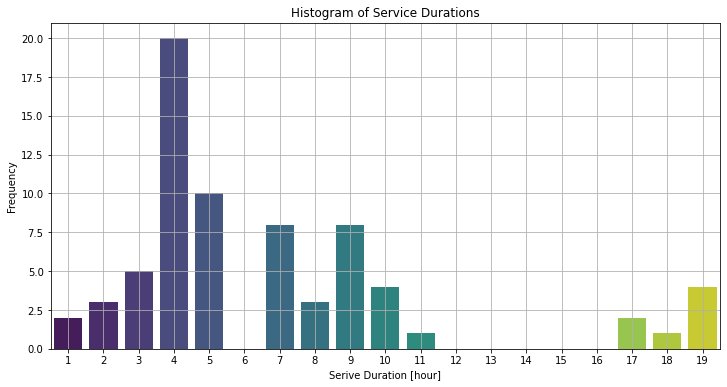

In [3]:
hlp.plot_post_delivery_service_durations(dcl.post_delivery_service_duration_events_df)

**Note**:
We observe a wide range of durations, with a concentration of events having shorter durations (peaking around 4 units), and then a gradual decrease in frequency as the duration increases. There are also spikes at higher durations (e.g., around 9 and 10 units), suggesting specific durations are more common for certain types of events. This analysis highlights the skewness towards shorter durations, with a long tail extending towards longer durations, indicating that while most events are shorter, there's a significant variety in event lengthsThis variation indicates a wide range of service times, highlighting the need for flexible staffing plans.

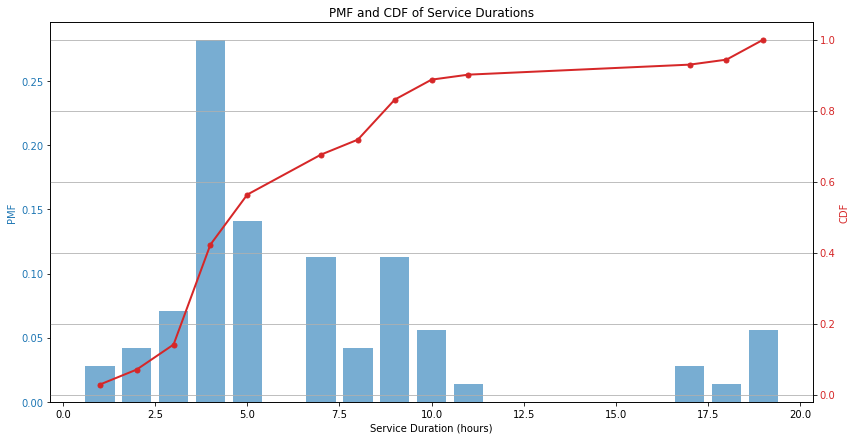

In [4]:
post_delivery_service_duration_events_pmf,post_delivery_service_duration_events_cdf=hlp.plot_post_delivery_service_PMF_CDF(dcl.post_delivery_service_duration_events_df)

Here PMF  of post-delivery service durations is represented by the blue bars, showing the probability of each specific service duration occurring. The CDF, shown by the red line with markers, represents the cumulative probability that a service duration is less than or equal to each value on the x-axis.

In [5]:
hlp.calculate_summary_statistics_post_delivery_service_durations(post_delivery_service_duration_events_pmf,post_delivery_service_duration_events_cdf)

{'Mean (Expected Service Duration)': 6.816901408450705, 'Variance': 20.121404483237455, 'Standard Deviation': 4.485688852700046, 'Skewness': 1.4855899241304862, 'Kurtosis': 1.6096441764874223, '25th Percentile (Q1)': 4.0, 'Median (Q2)': 8.0, '75th Percentile (Q3)': 11.0, 'Interquartile Range (IQR)': 7.0}


Given the skewness and kurtosis values we calculated earlier, distributions that can accommodate skewness (asymmetric data) and have flexibility in terms of the shape of their tail (kurtosis) would be initial candidates.

If we drop the integer service duration assumption, the gamma and Weibull distributions are often good candidates for modeling skewed data like service times. The choice of distribution would be based on the goodness-of-fit tests.

In [6]:
hlp.gamma_weibull_goodness_of_fit_test(dcl.post_delivery_service_duration_events_df)

{'Gamma': {'KS Statistic': 0.159247866617597, 'p-value': 0.0486089281713904}, 'Weibull': {'KS Statistic': 0.3805728406300536, 'p-value': 9.380540779749546e-10}}


Based on the Kolmogorov-Smirnov (KS) test results for fitting your service duration data to continuous distributions:

- **Gamma Distribution**
  - KS Statistic: 0.159
  - p-value: 0.049

- **Weibull Distribution**
  - KS Statistic: 0.381
  - p-value: ~0 (9.38e-10)
  
Based on these results, the **Gamma distribution** shows a better fit to the data compared to the Weibull distribution, as indicated by a higher p-value and a lower KS statistic. Although the p-value for the Gamma distribution is relatively close to the typical significance level (0.05). However, it's important to note that the fit is not perfect (as indicated by the p-value). So, due to the limited sample size and the complex nature of post-service times, creating a fitting distribution from the available data is challenging. Thus, we utilize the provided dataset and **bootstrapping technique** to create a non-parametric empirical distribution of post-delivery service durations.

**Aggregate Service Time Demand**

The total monthly service duration of a service center is random and stochastic and is the summation of pre-delivery and post delivery service durations. The total pre-delivery service durations follows a Gaussian distribution as discussed above. The post-delivery service durations are described with a non-parametric distribution. Assuming these two service type durations are independent of each other, the total service duration of the service center would be non-parametric. We denote the total service duration by a random variable $S$. If we denote the total post delivery service durations in a a month by $Y$, then:
$$S=X+Y$$

The following plots show the total pre-delivery, post-delivery, and all service durations of each service center per month for one scenario. We observe as time passes, the distribution of total service duration time converges to the distribution of post-delivery instances. 

In [7]:
_,service_center_monthly_volumes_dict=hlp.calculate_service_centers_monthly_delivered_volume(dcl.service_center_delivered_df)

#### Service Center 1

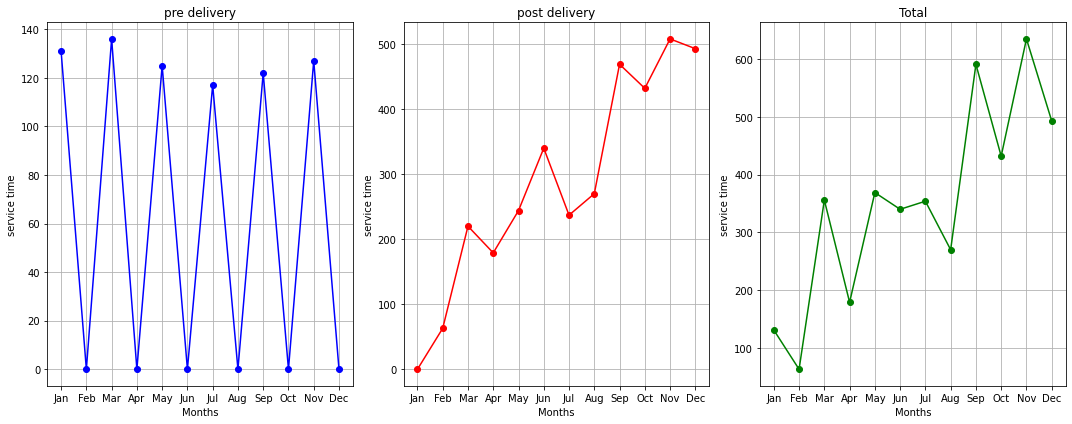

In [8]:
###### Service time at Center 1
c1_pre_delivery_service_time, c1_post_delivery_service_time,c1_total_service_time, c1_total_failed_vehicle = hlp.calculate_service_times(service_center_monthly_volumes_dict['Service Center 1'])
hlp.plot_multiple_lists(c1_pre_delivery_service_time, c1_post_delivery_service_time,c1_total_service_time)

#### Service Center 2

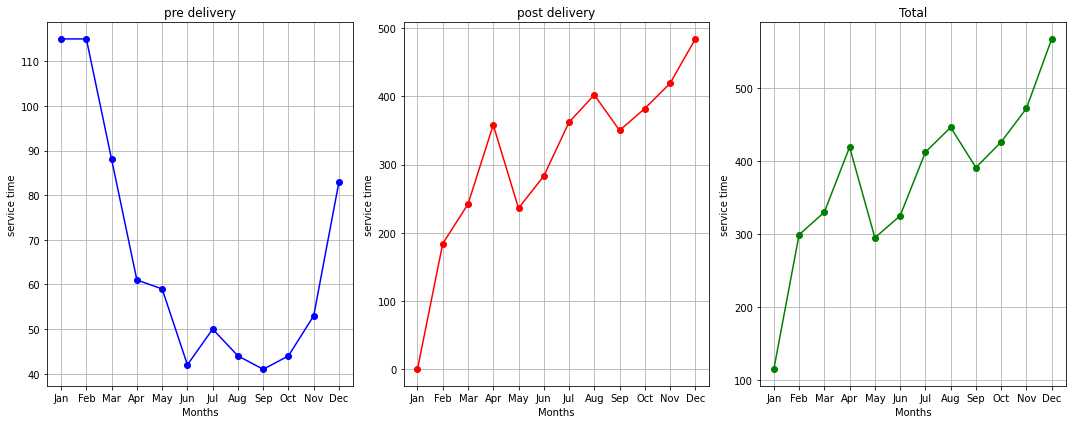

In [9]:
###### Service time at Center 2
c2_pre_delivery_service_time, c2_post_delivery_service_time,c2_total_service_time,_ = hlp.calculate_service_times(service_center_monthly_volumes_dict['Service Center 2'])
hlp.plot_multiple_lists(c2_pre_delivery_service_time, c2_post_delivery_service_time,c2_total_service_time)

#### b.
**How might you go about calculating the 95% confidence interval around your
solution? What are the advantages or disadvantages of this approach?**

Framework for 95% Confidence Interval Derivation

<u>Pre-delivery service durations: </u>

Pre-delivery service durations follow the Gaussian distribution. So the confidence interval is determined by the formula
$$\text{CI} = \mu \pm Z \cdot \frac{\sigma}{\sqrt{n}}$$

with $\mu$ denoting the mean, $\sigma$ the standard deviation, and $Z$ reflecting the Z-score that corresponds to the 95% confidence level (where, for this confidence level, $Z = 1.96$). If we denote the pre-delivery requests of month $t$ by $n_t$, we then have the following confidence interval for total pre-delivery service durations.

$$\text{CI} = (2n_t) \pm 1.96 \cdot n_t^2$$



<u> Post-delivery service durations: </u>

Unlike the pre-delivery service requests, the post-delivery service requests are random. In addition, the duration of post-delivery services are non-parametric. So, to create th 95% confidence interval for the post-delivery service durations in a month we use the bootstrapping technique as follows:

1. **Simulate Vehicle Arrivals**:
   - We describe the random arrival rate of post-delivery services with a Bernouli variable with a ($p = 0.25, variance=p*(1-p) = 0.1875 \sim 0.2$) to simulate the number of vehicle arrivals per day.
   
2. **Simulate Service Durations**:
   - Given the non-parametric distribution of service durations, we simulate service durations for each arriving vehicle. So for each post-delivery service requests, we randomly select one service duration from the provided historical data with replacement.

3. **Calculate Monthly Total Service Duration**:
   - For each simulated month, we sum the service durations for all vehicles to get the total service duration for that month.

4. **Bootstrap the Monthly Total Service Duration**:
   - We repeat the steps 1-3 many times (e.g., 10,000 bootstrap samples) to generate a distribution of simulated monthly total service durations.
   - For each bootstrap sample, we calculate the total service duration for the month.

5. **Calculate the 95% Confidence Interval**:
   - From the bootstrap distribution of monthly total service durations, we calculate the 2.5th and 97.5th percentiles to form the 95% confidence interval.



<u> Total service durations: </u>

To calculate the total service durations in a month, which is a summation of pre-delivery and post-delivery service durations, we follow the same procedure as described above.
1. **Simulate Samples**: From both the non-parametric post-delivery service duration distribution and the pre-delivery service durations which has Gaussian distribution.
2. **Sum the Samples**: For each simulation, sum the values from the non-parametric sample and the Gaussian sample.
3. **Bootstrap the Sum**: Repeat the simulation multiple times to create a bootstrap distribution of the sum.
4. **Calculate the Confidence Interval**: From the bootstrap distribution of the summed values, we calculate the 95% confidence interval.

Here is the confidence interval of the mean of the total service duration of service center 1. We observe that the confidene interval of the total service duration has an increasing trend.

**Service Center 1**

In [10]:
# Bootstraping - Service Center 1
c1_sampling_total_service_time, c1_sampling_pre_delivery_time, c1_sampling_post_delivery_time, c1_total_failed_vehicles = hlp.boostraping(service_center_monthly_volumes_dict['Service Center 1'])

In [11]:
#95% confidence interval of total service durations - service center 1
hlp.calculate_confidence_interval(c1_sampling_total_service_time)

[(120.46, 129.34),
 (76.74, 111.66),
 (269.08, 304.72),
 (148.46, 213.94),
 (335.21, 416.39),
 (236.87, 278.13),
 (424.54, 493.46),
 (317.65, 383.15),
 (481.71, 584.69),
 (377.03, 467.57),
 (558.66, 621.34),
 (482.3, 558.9)]

To see what causes this increasing positive trend, we create the boxplots of the pre-delivery and post-delivery service times over month.

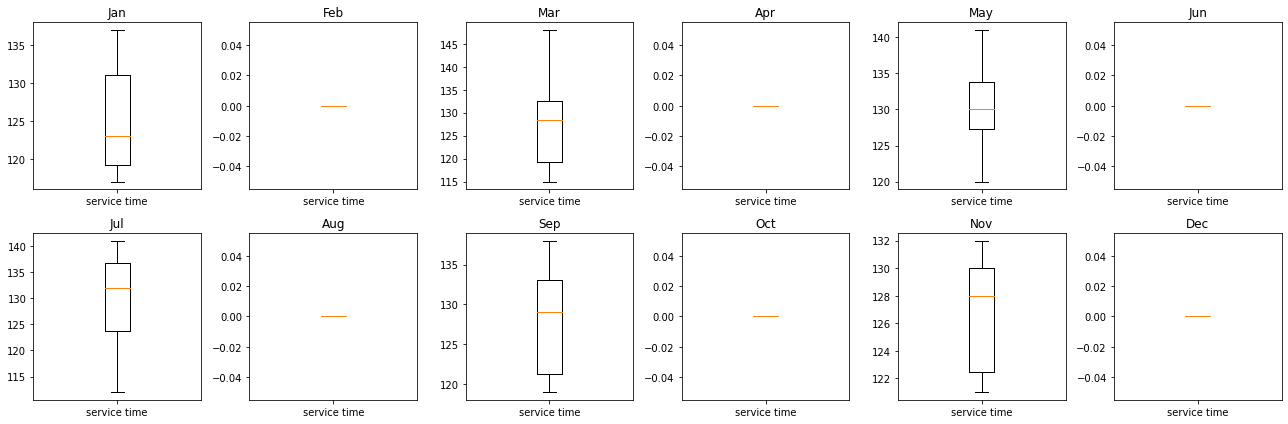

In [12]:
# Pre Delivery Service durations - Boxplot -Service Center 1
hlp.visualize_demand_statistics(c1_sampling_pre_delivery_time)


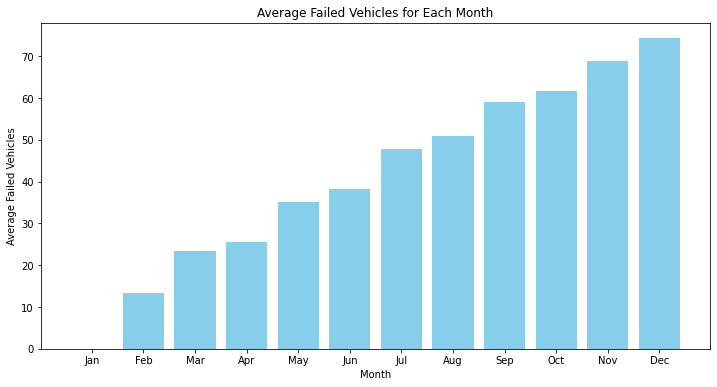

In [13]:
#Average number of post-delivery service requests per month - boostraping - Service Center 1
hlp.calculate_and_plot_average_failed_vehicles(c1_total_failed_vehicles)

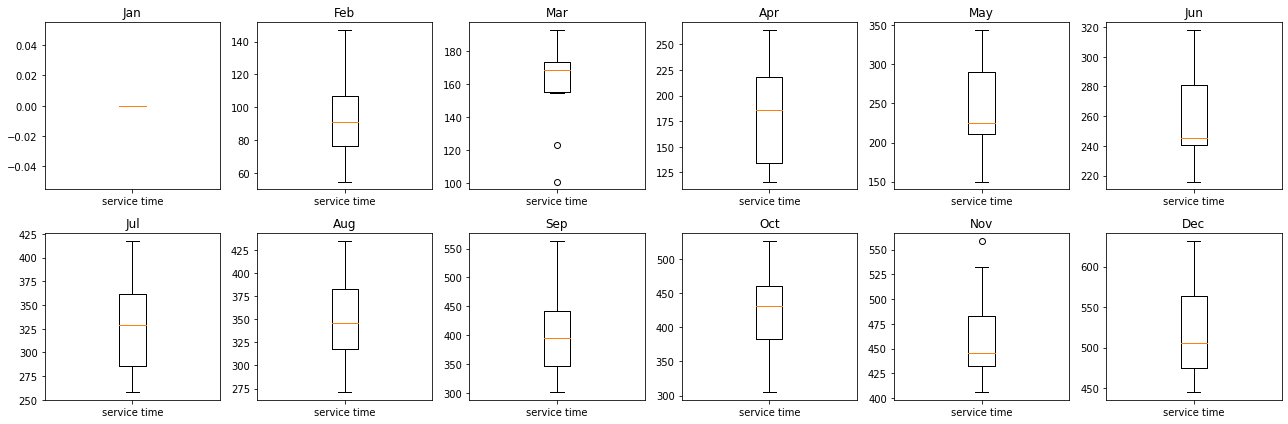

In [14]:
# Post Delivery Service durations - Boxplot -Service Center 1
hlp.visualize_demand_statistics(c1_sampling_post_delivery_time)


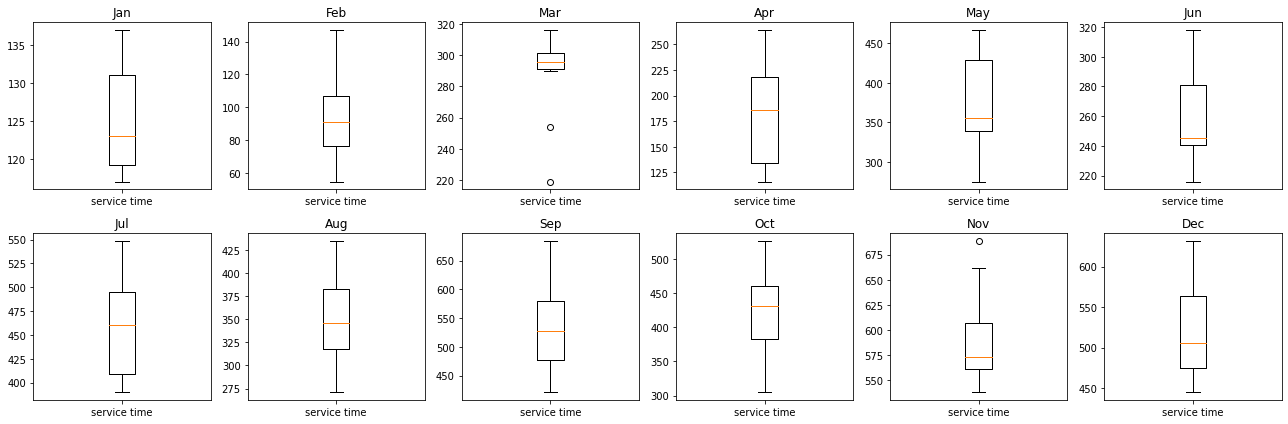

In [15]:
# Pre + Post Delivery Service durations - Boxplot -Service Center 1
hlp.visualize_demand_statistics(c1_sampling_total_service_time)


**Service Center 2**

In [16]:
# Bootstraping - Service Center 2
c2_sampling_total_service_time, c2_sampling_pre_delivery_time, c2_sampling_post_delivery_time,c2_total_failed_vehicles = hlp.boostraping(service_center_monthly_volumes_dict['Service Center 2'])


In [17]:
#95% confidence interval of total service durations - service center 2
hlp.calculate_confidence_interval(c2_sampling_total_service_time)

[(111.42, 116.78),
 (231.54, 273.26),
 (269.27, 345.73),
 (299.62, 339.38),
 (333.27, 366.53),
 (299.55, 373.65),
 (393.85, 462.15),
 (372.86, 454.34),
 (409.16, 499.24),
 (460.1, 550.3),
 (465.58, 516.22),
 (523.41, 606.79)]

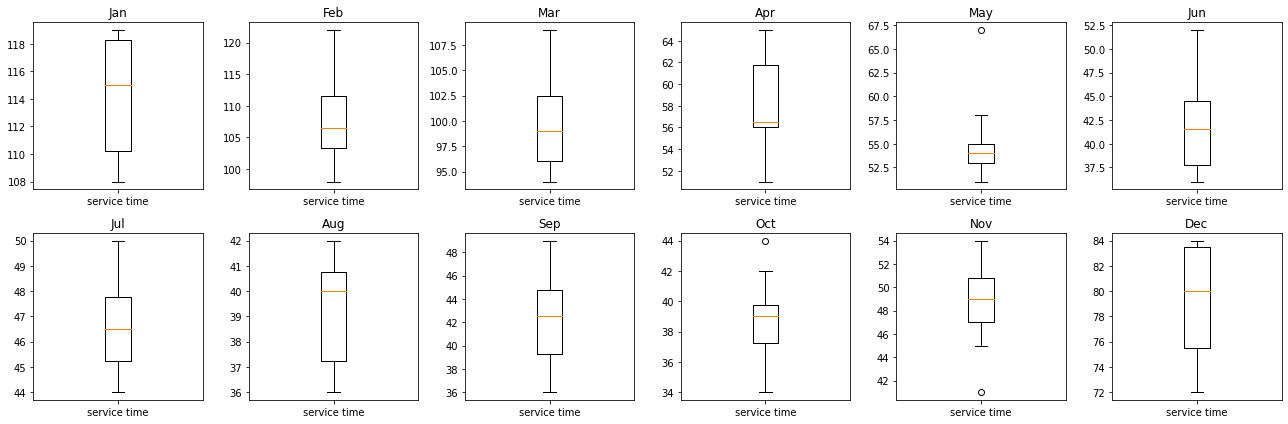

In [18]:
# Pre Delivery Service durations - Boxplot -Service Center 2
hlp.visualize_demand_statistics(c2_sampling_pre_delivery_time)


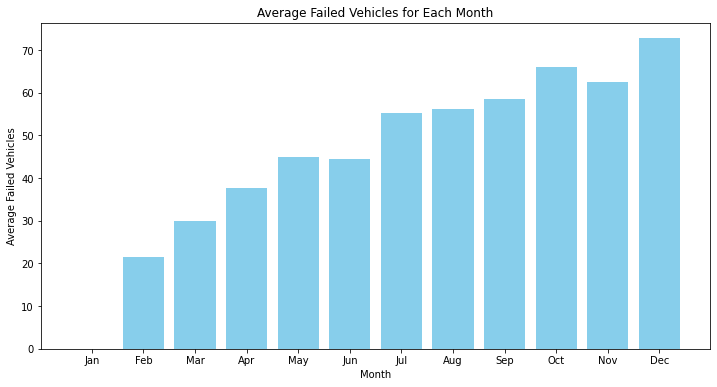

In [19]:
#Average number of post-delivery service requests per month - Service Center 2
hlp.calculate_and_plot_average_failed_vehicles(c2_total_failed_vehicles)

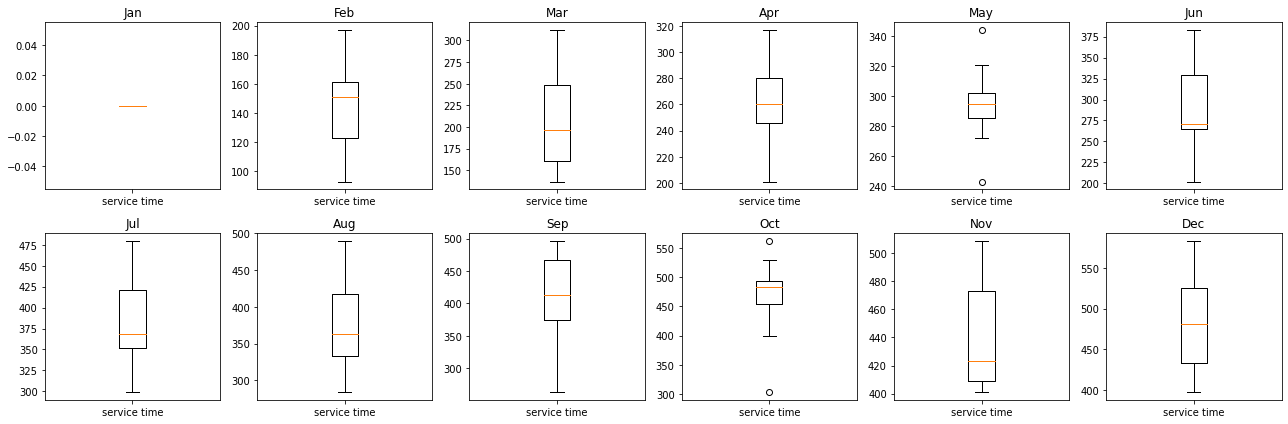

In [20]:
# Post Delivery Service durations - Boxplot -Service Center 2
hlp.visualize_demand_statistics(c2_sampling_post_delivery_time)


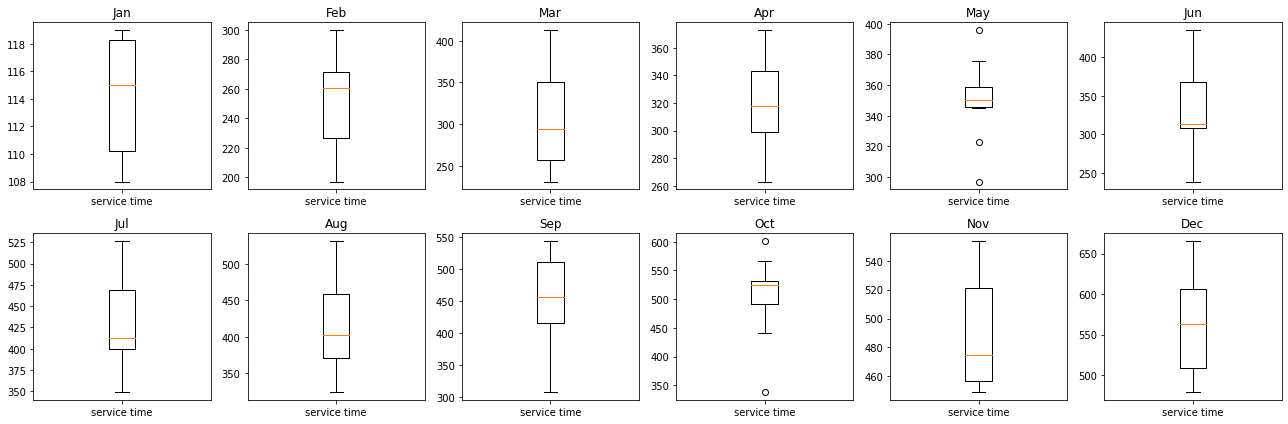

In [21]:
# Pre + Post Delivery Service durations - Boxplot -Service Center 2
hlp.visualize_demand_statistics(c2_sampling_total_service_time)


**What are the advantages and disadvantages of this methodology?**

The methodology of using bootstrapping and simulation for finding the 95% confidence interval of service durations in a service center offers several advantages and disadvantages:

### Advantages

This approach allows us to calculate the 95% confidence intervals of service durations without considering any specific distributions for post-delivery service durations. Particularly, the historical data of post-delivery service events suggest that it can be better described by a multimodal and parametric methods could not describe this random event.
In addition, simulating post-delivery arrival rates as well as post and pre-delivery service durations, allow us to include  variability from multiple sources, providing a more comprehensive understanding of service center demand loads and better staff planning.

### Disadvantages

The first and most important disadvantage of this methodology is that the accuracy of the confidence intervals depends heavily on the quality and representativeness of the historical data used for simulation and the accuracy of the underlying assumptions. Biases or anomalies in the data can lead to misleading results. In addition, it does not consider the interactions within the service center, such as dependencies between service arrival rates or service durations. Without explicitly modeling these dependencies, the accuracy of the interval estimations are under questions. Finally, while bootstrap method is powerful, they can sometimes produce biased estimates of confidence intervals for some parameters, especially for the post-delivery service duration data that the sample size is small and the distribution is highly skewed.

For skewed distribution like post-delivery service duration, median or other precentiles can provide a more robust confidence intervals and give a better sense of central tendency and variability within the dataset.

## Q2. 

**Given the data provided and assumptions:**

**a. Do we have a service fillfillement issue occuring across our 2 service centers?**
Since the 95% confidence intervals are increasing over month for both service centers, both service centers are facing service fulfillment issue. The level of unsatisfied service requests each month depends on the number of technicians hired though. To determine if there's a service fulfillment issue, we however need to compare the lower bound of the confidence intervals (to ensure a conservative estimate) with the total available work hours from technicians. If the lower bound of the required service time exceeds the total work hours provided by the technicians, it indicates a potential service fulfillment issue.We have to keep in mind that the calculated confidence intervals are on the mean of service durations. Given the post-delivery service skewness, the mean service duration may not capture the peak load demands and we may face service issues.

**b. What minimum technician capacity might you suggest to the lead based on the current data?**

### **<b>Method 1: determining the minimum number of technicians based on monthly confidene intervals**

To determine the minimum number of technicians over a month, we make the following assumptions:

1. We assume each technician can work for 168 hours. 
2. We also assume service durations are independent of the technicians skill levels. 
3. Each technician can work on both pre-delivery and post delivery services. 


The minimum number of technicians needed for each month can be calculated based on the lower bound of the confidence intervals.

Column *Min Technicians Needed (Lower Bound CI)* shows the minimum number of technicians needed for each month for **service center 1** and is calculated using the lower bounds of confidence intervals.

In [22]:
service_center_1_minimum_technicians = hlp.calculate_confidence_interval_and_technicians(c1_sampling_total_service_time)
service_center_1_minimum_technicians

,Month,Confidence Interval (CI),Min Technicians Needed (Lower Bound CI),Min Technicians Needed (Upper Bound CI)
0,Month 1,"(120.46, 129.34)",1,1
1,Month 2,"(76.74, 111.66)",1,1
2,Month 3,"(269.08, 304.72)",2,2
3,Month 4,"(148.46, 213.94)",1,2
4,Month 5,"(335.21, 416.39)",2,3
5,Month 6,"(236.87, 278.13)",2,2
6,Month 7,"(424.54, 493.46)",3,3
7,Month 8,"(317.65, 383.15)",2,3
8,Month 9,"(481.71, 584.69)",3,4
9,Month 10,"(377.03, 467.57)",3,3


### Interpretation:
- For all months, the number of technicians needed, based on the lower bounds, ranges between 1 to 4. This variation implies that service demand fluctuates throughout the year, and staffing levels might need adjustment accordingly.
- During several months (May, July, September, November), there's a notable increase in the required service duration, indicating peaks in service demand. Specifically, in September and November, the service center needs at least 4 technicians.
- Particularly in November, planning for up to 5 technicians (considering the upper bounds) could be critical to ensure service fulfillment without delays.

Column *Min Technicians Needed (Lower Bound CI)* shows the minimum number of technicians needed for each month for **service center 2** and is calculated using the lower bounds of confidence intervals

In [23]:
service_center_2_minimum_technicians =hlp.calculate_confidence_interval_and_technicians(c2_sampling_total_service_time)
service_center_2_minimum_technicians

,Month,Confidence Interval (CI),Min Technicians Needed (Lower Bound CI),Min Technicians Needed (Upper Bound CI)
0,Month 1,"(111.42, 116.78)",1,1
1,Month 2,"(231.54, 273.26)",2,2
2,Month 3,"(269.27, 345.73)",2,3
3,Month 4,"(299.62, 339.38)",2,3
4,Month 5,"(333.27, 366.53)",2,3
5,Month 6,"(299.55, 373.65)",2,3
6,Month 7,"(393.85, 462.15)",3,3
7,Month 8,"(372.86, 454.34)",3,3
8,Month 9,"(409.16, 499.24)",3,3
9,Month 10,"(460.1, 550.3)",3,4


- **For most of the year**, the *service center 2* need at least 2 to 3 technicians to meet the service demand confidently, based on the lower bound of service times.
- **In December**, the demand increases significantly, requiring at least 4 technicians to avoid service fulfillment issues.

If the service centers operate with fewer technicians than these calculated minimums in any month, it would likely face service fulfillment issues, resulting in longer wait times and service backlogs. 

### **<b>Method 2: determining the minimum number of technicians using Dicrete Event Simulation (DES)**

As our second approach, we utilize simulation technique to find the minimum number of technicians required by analyzing its impact on the performance of service centers complex processes. To do so, we develop a Python package named `StaffPlanalytics` to model the operation of service centers as a sequence of discrete events in time. The detailed of the developed Python package is breifly provided in the *StaffPlanalytics_User_Manual*.


Here is the description of the simulation process:

We simulate the operations of service centers 1 and 2 for the year 2023 based on the given historical data and assumptions. Here is a list of key input parameters considered in the simulation process:

```python

#-------------------------------------#
list_of_service_centers=['Service Center 1','Service Center 2']
pre_delivery_service_type_str='pre-delivery'
post_delivery_service_type_str='post-delivery'
list_of_service_types=['pre-delivery','post-delivery']
#--------------------parameters----------------------------#
number_of_service_centers=2
minimum_number_of_technicians=1
maximum_number_of_technicians=5
pre_delivery_service_duration_mean=2
pre_delivery_service_duration_variance=1
post_delivery_service_arrival_mean=0.25
post_delivery_service_arrival_variance=0.2
#---------------------------------------------
year=2023
number_of_months=12
max_working_hours_service_center_in_month=168
max_working_hours_of_technicians_in_month=168
number_of_simulation_scenarios=50

```
We evaluate the performance of service centers under different staff levels to find the optimal number of technicians for each service center. To do so, **we increase the number of technicians from 1 to 5** and simulate the operations of service centers for a whole year. We repeat this process 50 times with different scenario realizations. During this process, we track key performance metrics of each service center. Here is a list of tracked performance metrics:

```python
#Service demands
number_of_services_str='number of services'
number_of_pre_delivery_services_str='number of pre-delivery services'
number_of_post_delivery_services_str='number of post-delivery services'

# Service demands
pre_delivery_service_demands_duration_str='total pre-delivery service duration'
post_delivery_service_demands_duration_str='total post_delivery service duration'
total_service_demands_duration_str='total service demands duration'

# Performance metric: fulfilled services, quantity
number_of_fulfilled_services_str='number of fulfilled services'
number_of_fulfilled_pre_delivery_services_str='number of fulfilled pre-delivery services'
number_of_fulfilled_post_delivery_services_str='number of fulfilled post-delivery services'

# Performance metric: fulfilled services, time
duration_of_fulfilled_services_str='duration of fulfilled services'
duration_of_fulfilled_pre_delivery_services_str='duration of fulfilled pre-delivery services'
duration_of_fulfilled_post_delivery_services_str='duration of fulfilled post-delivery services'

# Performance metric: 
queue_waiting_time_str='average waiting time in queue' #sum(arrival_time-start_service_time)
backlog_service_demand_durations_str='service demand duration backlog' #sum(backlogged service durations)
technicians_worked_hours_str='number of worked hours in a month'

```
In what follows, you can see the averaged performance metrics of each service center for each month.

In [4]:
import pandas as pd
df_final_monthly_performance_metrics=pd.read_csv('all_service_centers_average_monthly_performance_metrics.csv')

In [13]:
df_final_monthly_performance_metrics.head(3)

,Unnamed: 0,Month,Service Center ID,Number of Technicians,number of services,number of pre-delivery services,number of post-delivery services,number of fulfilled services,number of fulfilled pre-delivery services,number of fulfilled post-delivery services,average waiting time in queue,number of worked hours in a month,total pre-delivery service duration,total post_delivery service duration,total service demands duration,duration of fulfilled services,duration of fulfilled pre-delivery services,duration of fulfilled post-delivery services,service demand duration backlog
0,0,1,1,1,50.00,50,0.00,1.00,1.0,0.00,165.825600,2.60,126.72,0.00,126.72,2.60,2.60,0.00,0.00
1,1,2,1,1,0.22,0,0.22,0.22,0.0,0.22,331.045455,1.62,0.00,1.62,1.62,1.62,0.00,1.62,124.12
2,2,3,1,1,50.24,50,0.24,1.14,1.0,0.14,331.079032,3.30,127.72,1.64,129.36,3.30,2.48,0.82,124.12


We next analyze the performance of each service center based on the number of technicians considered. To evaluate the performance of service center operations, we focus on the average waiting time in the queue, average backlog of the service center, the average number of fulfilled service demands, and the utilization of technicians.

- The waiting time of a vehicle in the queue is defined as the difference between the service request time until the service gets started. (service duration is not considered). So, if a vehicle makes a service request in January but it's service started in February at hour=10, it's waiting time in the system would be 168+10 hours.

- The backlog of a service center is defined as the total unsatisfied service durations in a month. So for example, if a service center has 120 hours request for pre-delivery services in January and 80 hours for post-delivery requests, but could satisfy 100 of those. Then the backlog of Januray would be counted as 100 hours of services. 

- A service request is counted as a fulfilled service, if a technician is assigned and started working on the vehicle. We calculate the number of fulfilled services per service type and in total.

- We track the average total number of hours technicians worked in a month. This metric would allow us to evaluate the utilization of technicians.

### Service Center 1

**Number of service request volumes**

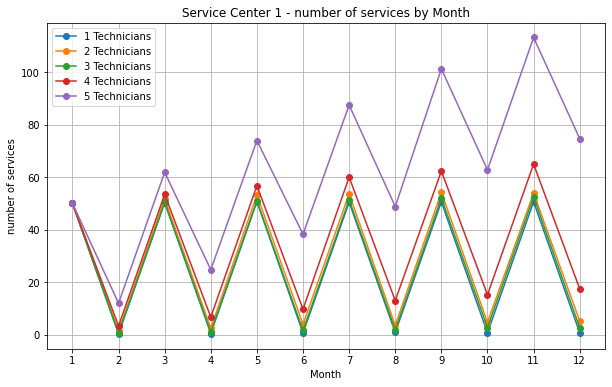

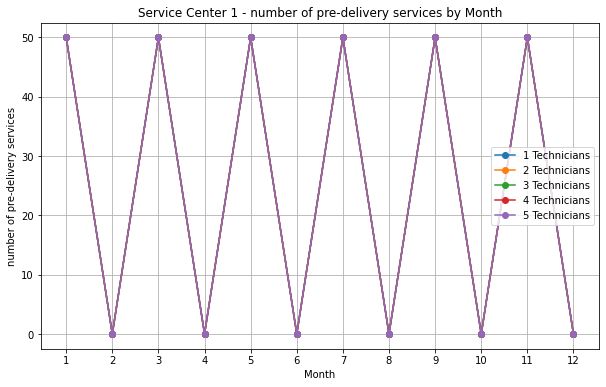

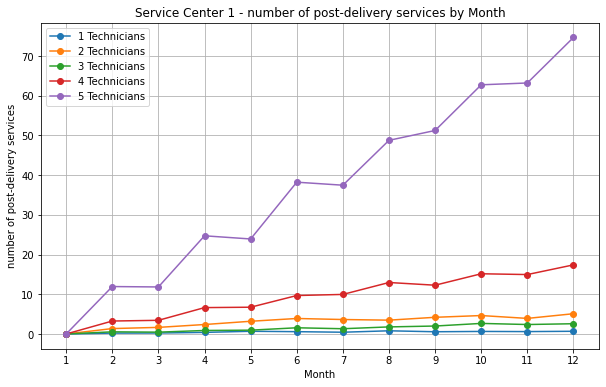

In [21]:
service_center_id=1
for key in [dcl.number_of_services_str,dcl.number_of_pre_delivery_services_str,dcl.number_of_post_delivery_services_str]:
    utl.plot_monthly_performance_metric(df=df_final_monthly_performance_metrics,service_center_id=service_center_id,performance_metric=key)

As the number of technicians increases, the number of post-delivery requests also increases. This is do to the assumption we make for the simulation. We assume vehicles that their pre-delivery process fulfilled in a month, are eligible and may request for post delivery service. In other words, only on-the-road vehicles that have not yet requested for a service are possible to make a post-delivery request. We model arrival rate of post-delivery request of these vehicles with a Bernouli random variable.

**Number of fulfilled services**

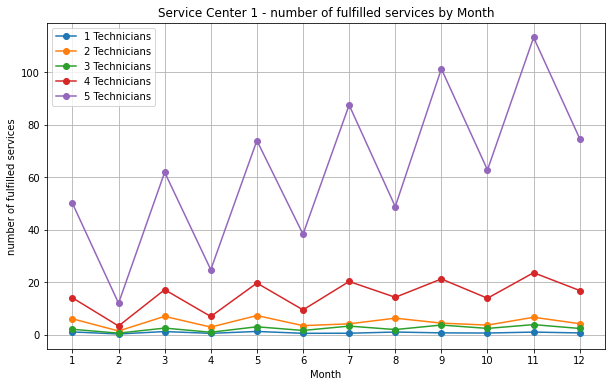

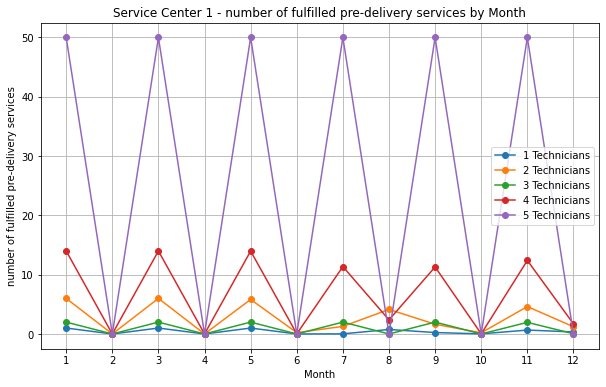

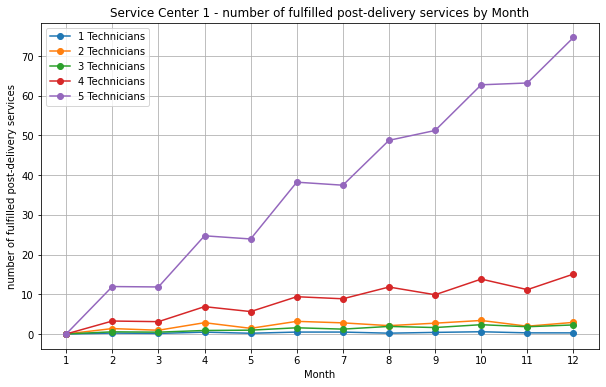

In [10]:
service_center_id=1
for key in [dcl.number_of_fulfilled_services_str,dcl.number_of_fulfilled_pre_delivery_services_str,dcl.number_of_fulfilled_post_delivery_services_str]:
    utl.plot_monthly_performance_metric(df=df_final_monthly_performance_metrics,service_center_id=service_center_id,performance_metric=key)

We see as the number of technician increase from 1 to 5, the service center is able to satisfy more service demands. In addition to demand fulfillment, it is important to look at the backlog of the service center. In what follows, we see as the number of technicians increases from 4 to 5, the backlog of the system suddenly decreases. Here is a clear example of *Bullwhip effect*, where a small backlog at the beginning of the system make a huge impact on the ability of the system to satisfy the upcoming service demands.

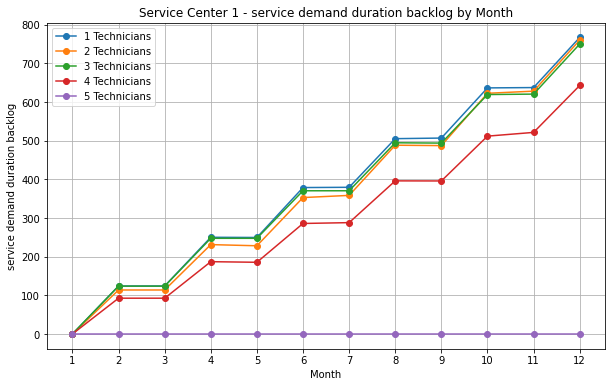

In [15]:
service_center_id=1
for key in [dcl.backlog_service_demand_durations_str]:
    utl.plot_monthly_performance_metric(df=df_final_monthly_performance_metrics,service_center_id=service_center_id,performance_metric=key)

#### Conclusions:

Based on the simulation results, the minimum number of technicians required for service center 1 would be 5. We note even if we go with the upper bounds of the service duration's confidence interval, the recommended number of technicians would be 4. This is a clear example of how planning based on confidence intervals and average service times fall short when there are so many uncertainties within the system. This analysis ofcourse can be extended. Instead of hiring an additional full-time technician, one might evaluate the impact of hiring part-time technicians for specific months and see how the system performance change over time. 

In [11]:
df_final_monthly_performance_metrics[(df_final_monthly_performance_metrics['Service Center ID']==1)&(df_final_monthly_performance_metrics['Number of Technicians']==5)].tail(12)

,Unnamed: 0,Month,Service Center ID,Number of Technicians,number of services,number of pre-delivery services,number of post-delivery services,number of fulfilled services,number of fulfilled pre-delivery services,number of fulfilled post-delivery services,average waiting time in queue,number of worked hours in a month,total pre-delivery service duration,total post_delivery service duration,total service demands duration,duration of fulfilled services,duration of fulfilled pre-delivery services,duration of fulfilled post-delivery services,service demand duration backlog
48,48,1,1,5,50.00,50,0.00,50.00,50.0,0.00,11.383200,127.46,127.46,0.00,127.46,127.46,127.46,0.00,0.0
49,49,2,1,5,11.94,0,11.94,11.94,0.0,11.94,15.540812,80.88,0.00,80.88,80.88,80.88,0.00,80.88,0.0
50,50,3,1,5,61.84,50,11.84,61.84,50.0,11.84,17.133562,209.50,127.00,82.50,209.50,209.50,127.00,82.50,0.0
51,51,4,1,5,24.72,0,24.72,24.72,0.0,24.72,27.976409,169.86,0.00,169.86,169.86,169.86,0.00,169.86,0.0
52,52,5,1,5,73.92,50,23.92,73.92,50.0,23.92,25.720998,287.14,128.04,159.10,287.14,287.14,128.04,159.10,0.0
53,53,6,1,5,38.22,0,38.22,38.22,0.0,38.22,43.587298,264.08,0.00,264.08,264.08,264.08,0.00,264.08,0.0
54,54,7,1,5,87.46,50,37.46,87.46,50.0,37.46,38.906789,388.80,128.70,260.10,388.80,388.80,128.70,260.10,0.0
55,55,8,1,5,48.76,0,48.76,48.76,0.0,48.76,61.707911,331.28,0.00,331.28,331.28,331.28,0.00,331.28,0.0
56,56,9,1,5,101.24,50,51.24,101.24,50.0,51.24,54.667805,483.92,128.28,355.64,483.92,483.92,128.28,355.64,0.0
57,57,10,1,5,62.74,0,62.74,62.74,0.0,62.74,83.048954,426.12,0.00,426.12,426.12,426.12,0.00,426.12,0.0


### Service Center 2

**Number of Services requests**

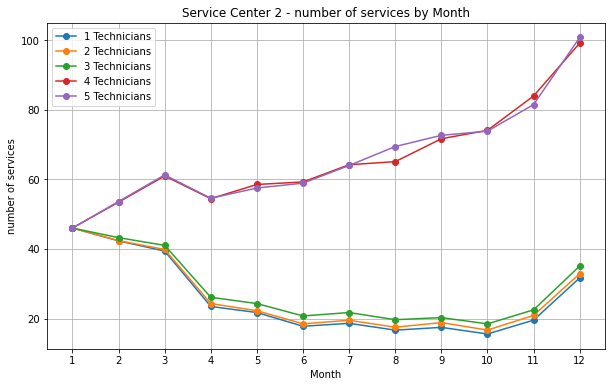

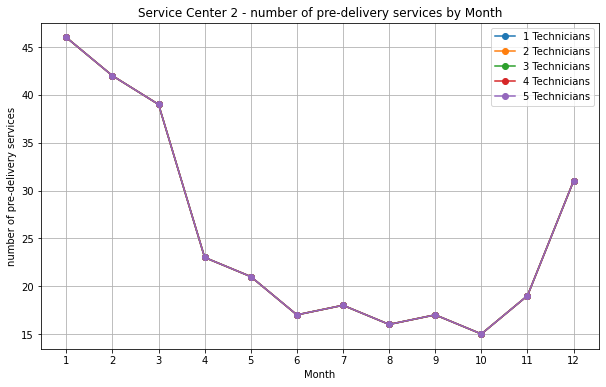

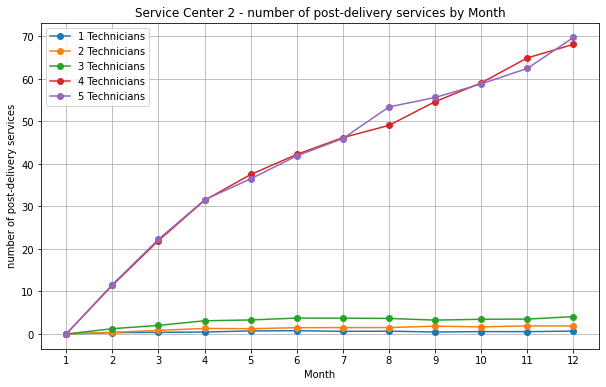

In [22]:
service_center_id=2
for key in [dcl.number_of_services_str,dcl.number_of_pre_delivery_services_str,dcl.number_of_post_delivery_services_str]:
    utl.plot_monthly_performance_metric(df=df_final_monthly_performance_metrics,service_center_id=service_center_id,performance_metric=key)

**Number of fulfilled services**

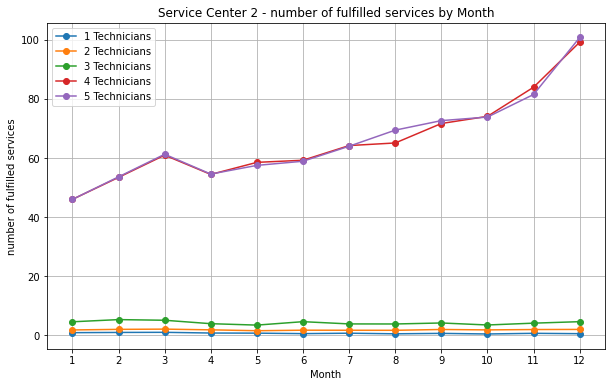

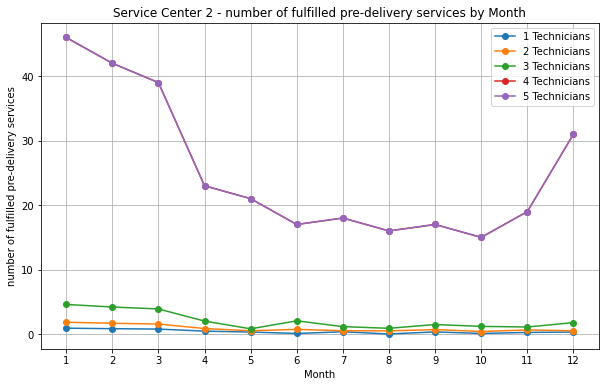

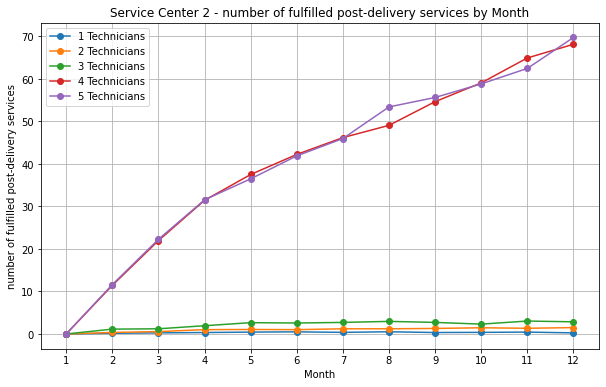

In [19]:
service_center_id=2
for key in [dcl.number_of_fulfilled_services_str,dcl.number_of_fulfilled_pre_delivery_services_str,dcl.number_of_fulfilled_post_delivery_services_str]:
    utl.plot_monthly_performance_metric(df=df_final_monthly_performance_metrics,service_center_id=service_center_id,performance_metric=key)

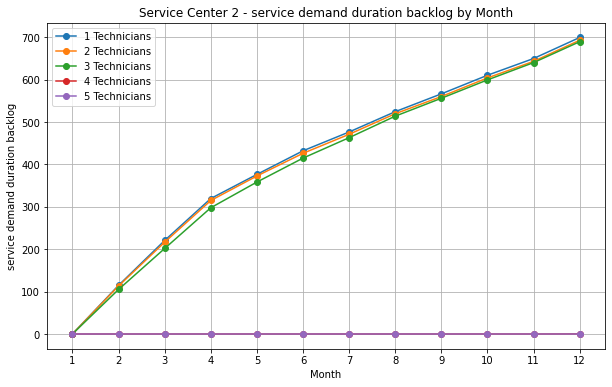

In [20]:
service_center_id=2
for key in [dcl.backlog_service_demand_durations_str]:
    utl.plot_monthly_performance_metric(df=df_final_monthly_performance_metrics,service_center_id=service_center_id,performance_metric=key)

In [23]:
df_final_monthly_performance_metrics[(df_final_monthly_performance_metrics['Service Center ID']==2)&(df_final_monthly_performance_metrics['Number of Technicians']==4)].tail(12)

,Unnamed: 0,Month,Service Center ID,Number of Technicians,number of services,number of pre-delivery services,number of post-delivery services,number of fulfilled services,number of fulfilled pre-delivery services,number of fulfilled post-delivery services,average waiting time in queue,number of worked hours in a month,total pre-delivery service duration,total post_delivery service duration,total service demands duration,duration of fulfilled services,duration of fulfilled pre-delivery services,duration of fulfilled post-delivery services,service demand duration backlog
96,96,1,2,4,46.00,46,0.00,46.00,46.0,0.00,13.219565,116.82,116.82,0.00,116.82,116.82,116.82,0.00,0.00
97,97,2,2,4,53.44,42,11.44,53.44,42.0,11.44,19.371506,186.82,108.30,78.52,186.82,186.82,108.30,78.52,0.00
98,98,3,2,4,60.96,39,21.96,60.96,39.0,21.96,27.136027,245.62,99.08,146.54,245.62,245.62,99.08,146.54,0.00
99,99,4,2,4,54.44,23,31.44,54.44,23.0,31.44,36.326314,272.10,59.08,213.02,272.10,272.10,59.08,213.02,0.00
100,100,5,2,4,58.52,21,37.52,58.52,21.0,37.52,45.405161,309.26,54.72,254.54,309.26,309.26,54.72,254.54,0.00
101,101,6,2,4,59.24,17,42.24,59.24,17.0,42.24,56.691081,333.26,43.40,289.86,333.26,333.26,43.40,289.86,0.00
102,102,7,2,4,64.20,18,46.20,64.20,18.0,46.20,64.497622,366.90,45.64,321.26,366.90,366.90,45.64,321.26,0.00
103,103,8,2,4,65.08,16,49.08,65.08,16.0,49.08,72.366053,379.68,41.58,338.10,379.68,379.68,41.58,338.10,0.00
104,104,9,2,4,71.66,17,54.66,71.66,17.0,54.66,84.584718,415.40,43.56,371.84,415.40,415.40,43.56,371.84,0.00
105,105,10,2,4,74.08,15,59.08,74.08,15.0,59.08,97.532474,441.02,38.18,402.84,441.02,441.02,38.18,402.84,0.00


#### Conclusions:

Based on the simulation results, the minimum number of technicians required for service center 2 would be 4. If we go with a lower bound of the service durations confidence interval and choose the maximum number of technicians suggested, the result recommended number of technicians from the simulation and confidence interval would match. 

This analysis ofcourse can be extended. To further improve the staff planning process, specifically determining the minimum number of technicians per service center, we could include the following modules:
- **Predictive Analytics module**: The accuray of predicted service volumes, arrival rates, and service durations would significantly impact the quality of the staff planning using any optimization or simulation techniques.As such, we could utilize machine learning and statistical techniques to predict the incoming service centers demand for each region based on the historical data of service demands, real-time data of vehicles, if possible, market information, etc. We can also leverage statistical techniques such as Bayesian statistics to update the current distribution of service arrivals, service durations, and failure rates of vehicles based on the most recent collected data. We can feed this information to the simulation or optimization module in forms of scenarios or determinisitc values and plan ahead.

- **Technician Planning Optimization module**: If costs of the system such as service fulfillment cost, transportation costs, labor costs, etc were included, we could optimize the number of technicians to hire and evaluate our decisions using the simulation module. The technician planning optimization can be modeled as a deterministic model. For this model, all parameters inculing service demands, technicians working ours, service demand arrivals and durations are considered deterministic and known. We can also use stochastic programming or Robust optimization techniques to incorporate the inherent uncertainty and stochasticity within the service center processes.


## Q2 
### **Discuss what situations might alter initial conclusions. Consider how additional data source or events that you hypothesize could impact your results**

These initial analysis are drawn based on simplified assumptions. In addition, we overlooked other factors that may increase uncertanties or introduce disruptions in the service fulfillment process. Here are some factors that might impact the ability of service centers in satisfying service demands with the specified minimum number of technicians:

### 1. **Changes in Service Demand**:
- **Seasonal Variations**: An increase in service demands during certain seasons could impact the calculated service duration consifdence intervals.
- **Arrival rates**: We also assume service requests are coming in a constant rate within a month. But there could be weekly demand changes such as higher demands during weekends and lower during weekdays or certain time of days.
- **Market Trends**: The pre-delivery service requests is also impacted by auto industry market situation and could either increase or decrease the predicted pre-delivery service demands.

### 2. **Workforce Dynamics**:
- **Technician Efficiency**: Variations in technician skill levels, efficiency improvements or fatigues over time, or changes in work patterns (like remote diagnostics) could affect how many hours are effectively needed.
- **Absenteeism and Turnover**: Here we assume all technicians are fully available during each month, 168 hours. High rates of absenteeism or staff turnover could impact the results and necessitate additional staffing beyond what is calculated based on service duration alone.
- **Process Improvements**: Implementing more efficient service processes or adopting new technologies could decrease service durations, altering staffing needs.

### 3. **Data Quality and Scope**:
- **Historical Data Limitations**: The analysis relies on historical service duration data. If this data is not representative of future conditions (due to changes in service scope, customer base, etc.), conclusions may be skewed.
- **Availability of Predictive Data**: Additional data sources providing insights into future trends, customer intentions, or competitor actions could significantly enhance service demand forecasting and staffing planning.

### 4. **External Events**:
- **Economic Conditions**: Economic downturns or booms can affect customer behavior, potentially leading to reduced or increased service demands.
- **Supply Chain Issues**: Delays in receiving parts or equipment could extend service durations or create bottlenecks, requiring adjustments in staffing.

### 5. **Additional Important Factors**:
- **Costs**: Including costs such as labor costs, overtime, and potential penalties for service delays into our analysis would allow to provide a comprehensive cost-benefit analysis of different service technicians levels, aiding in finding the optimal balance between service quality and cost.

-**Distribution of Customers**: 



### Conclusion:
While the analysis of confidence intervals provides a foundational understanding of staffing needs based on historical service durations, it's essential to consider these factors and incorporate flexibility into staffing plans. Continuous monitoring of relevant data and trends, along with adaptable operational strategies, can help ensure that service centers are well-prepared to meet demand efficiently under varying conditions.

## Q3.

**Regional service dealership is trying to understand how to forecast service demand at the various service centers across North America, given the current approach to the company service and the volume of vehicles on the road today**


### a. How should we define the problem.

**Defining the Service Demand Forecasting Problem**

**Objective Clarification:** The primary goal is to accurately forecast the demand for service at the company's regional service centers across North America. This involves predicting the number of service appointments, types of services required, and the timing of these demands.

**Scope Determination:** Specify the forecasting horizon (short-term vs. long-term), the granularity of the forecast (daily, weekly, monthly), and the geographic scope (national, regional, local).

**Data Identification:** Determine the relevant the company-specific and external data needed for the forecasts, including historical service records, vehicle sales data, telematics data, economic indicators, and environmental factors.

**Problem Framing:** Frame the forecasting problem as a combination of time series analysis and predictive modeling, given the temporal nature of the data and the influence of multiple external factors.
    
#### b. What the company or non-the company data would help you in this problem? why?


##### the company-Specific Data:

1. **Service Records:** Patterns from past services help predict future needs.
2. **Vehicle Sales Data:** Sales distribution informs about the potential service market size.
3. **Telematics Data:** Vehicle health indicators preemptively signal service requirements.
4. **Customer Feedback and Warranty Claims:** Insights into recurring issues guide demand forecasting for specific services.

##### External Data:

1. **Economic Indicators:** Economic trends influence consumer spending on vehicle maintenance.
2. **Weather Data:** Local climate conditions affect the frequency and type of vehicle services needed.
3. **Traffic and Road Quality:** High traffic and poor roads can increase vehicle wear, impacting service demand.
4. **Competitor Analysis and Market Trends:** Understanding competitor offerings and market shifts helps anticipate changes in service demand.

##### Why This Combination Is Effective:

- **Enhanced Predictive Power:** Integrating detailed the company data with broader external influences leads to more accurate demand forecasts.
- **Regional Tailoring:** The data mix enables customized forecasts for specific areas, considering local nuances like weather and economic conditions.
- **Strategic Planning:** A comprehensive data approach supports better inventory management, staffing optimization, and customer satisfaction through proactive service scheduling.

#### c. What are two approaches or models you would use to solve this problem?

**Time Series Forecasting Models**

Given the temporal nature of service demand, my first inclination is to leverage Time Series Forecasting Models. These models excel in analyzing data points collected over time, allowing me to capture trends, seasonal variations, and cyclic patterns which are often present in service demand data.

ARIMA (AutoRegressive Integrated Moving Average) stands out as a primary choice due to its flexibility in modeling time series that show trends and autocorrelation. For data exhibiting clear seasonal patterns, I would consider SARIMA (Seasonal ARIMA), which extends ARIMA by adding seasonal terms, making it highly effective for forecasting in scenarios where service demand peaks during specific times of the year.

**Machine Learning Regression Models**

To complement the time series analysis and capture complex, nonlinear relationships between various predictors and service demand, I would employ Machine Learning Regression Models. These models are invaluable when the forecast needs to consider multiple influencing factors beyond just the time series component.

Random Forest Regression and Gradient Boosting Machines (GBM), including specific implementations like XGBoost, LightGBM, and CatBoost, are my go-to choices. Random Forest offers the benefit of handling both numerical and categorical variables efficiently, reducing the risk of overfitting by averaging multiple decision trees. GBM, on the other hand, incrementally builds trees to correct previous errors, offering high accuracy at the cost of being more prone to overfitting if not properly tuned.

#### d. What are the considerations or tradeoffs you would want to discuss with each approach?

##### **Time Series Forecasting Models (e.g., ARIMA, SARIMA)**

<u>**Considerations:** </u>

**Data Requirements:** These models work best with large, historical time series data that exhibit clear trends or seasonal patterns.

**Stationarity:** The data must be stationary for ARIMA models to work effectively, requiring transformations like differencing or detrending.

**Seasonality:** SARIMA and other seasonal models can handle seasonality, which is advantageous for data with known cyclical patterns.

<u>**Tradeoffs:** </u>

**Complexity vs. Interpretability:** While ARIMA models are highly interpretable, capturing complex seasonal patterns (especially with multiple seasonal cycles) can make the model and parameter selection process more complex.
Forecast Horizon: These models are generally more accurate for short to medium-term forecasts. Their performance can degrade for long-term forecasting due to the increasing uncertainty over time.

##### **Machine Learning Regression Models (e.g., Random Forest, Gradient Boosting Machines)**

<u>**Considerations:** </u>

**Feature Engineering:** Effective use of machine learning models requires thoughtful feature engineering to capture the factors influencing service demand.

**Model Complexity:** These models can capture complex, nonlinear relationships between features and the target variable, which might not be feasible with simpler time series models.

<u>**Tradeoffs:** </u>

**Interpretability vs. Performance:** Machine learning models, especially ensemble methods and deep learning, can offer superior performance but at the cost of reduced interpretability compared to simpler models.

**Overfitting Risk:** There's a higher risk of overfitting with machine learning models, necessitating careful tuning and validation to ensure that the model generalizes well to unseen data.

**Computational Resources:** Training complex machine learning models, particularly with large datasets, can be computationally intensive and time-consuming.


##### e. How would you asess the accuracy of the your model?

I primarily rely on splitting the dataset into training and testing sets to evaluate how well the model performs on unseen data, employing cross-validation for a more robust assessment. Key metrics such as Mean Absolute Error (MAE), Root Mean Square Error (RMSE), Mean Absolute Percentage Error (MAPE), and R-squared (R²) provide a quantitative measure of the model's accuracy, with each metric offering insights into different aspects of the model's performance. Residual analysis further helps in identifying any systematic errors in the predictions.

Beyond these statistical measures, comparing the model’s performance against simple benchmarks and real-world A/B testing are crucial steps to ensure the model's practical utility. Continuous monitoring of the model's performance post-deployment ensures it adapts to changing conditions and remains accurate over time. This holistic approach ensures that the chosen forecasting model is not only statistically sound but also aligns with the operational goals and provides actionable insights for decision-making.

##### f. Assume that the future forecast of volumes is given, how might you incorporate that forecast into your model, what are issues you foresee with this?

Incorporating future forecast volumes into predictive models offers a strategic approach to enhancing model accuracy by factoring in anticipated market changes or trends. This can be achieved in several ways: using forecast volumes as explanatory variables to adjust predictions based on external trends like market demand or competitor actions; modifying the target variable with forecasted adjustments to train the model on a blend of historical and anticipated future data; and conducting scenario analysis to explore how different growth scenarios might impact predictions. Each method aims to refine the model's predictive capability by integrating foresight into its calculations, allowing for a more dynamic and informed forecasting process.

However, this approach comes with its set of challenges that can affect the reliability and generalizability of the model. The primary concern lies in the accuracy of the forecast volumes themselves. Inaccurate forecasts can mislead the model, resulting in predictions that diverge from actual outcomes. Moreover, there's a risk of the model overfitting to these forecasts, particularly if the projections are too optimistic or pessimistic, which can impair the model's performance in real-world conditions. Additionally, the future's inherent uncertainty means that many factors influencing forecast volumes can shift, potentially rendering the model less responsive to actual changes if it heavily relies on static forecasts.

Navigating these complexities requires a careful and critical evaluation of forecast sources and methodologies, as well as ongoing validation of the model against real-world data. This iterative process ensures that the model remains adaptable and accurate, capable of reflecting both current trends and future possibilities. By thoughtfully integrating future forecasts and continuously monitoring model performance, data scientists can create robust predictive models that support strategic decision-making in the face of uncertainty.



## Q4.

**Exploring your breadth of data science below are some examples of questions we might be asked to solve as a data scientist. In 2-4 sentences, briefly describe how you might approach each problem?**

#### a. identify groups of vehicles that display similar patterns for service behavior?

To categorize vehicles into groups that exhibit similar service behavior patterns, I would lean towards using unsupervised learning techniques, specifically clustering algorithms such as K-means or hierarchical clustering, which are well-suited for such tasks. This approach falls under the umbrella of unsupervised learning or graph theory, where the objective is to discover natural groupings in the data based on shared characteristics without predefined labels. Key features for clustering might include service frequency, types of services needed, mileage at the time of service, and vehicle age.

### b. How might you model the expected daily service volume that accounts for weekly and seasonal fluctuations in service loaners needs across the company?

To model expected daily service volume with weekly and seasonal fluctuations for the company's service loaners, leveraging Long Short-Term Memory (LSTM) networks, a type of deep learning model, is a highly effective approach. LSTMs excel in capturing temporal dependencies and patterns in time series data, making them well-suited for forecasting tasks that involve complex cyclic and seasonal trends. By incorporating features such as day of the week, seasonal indicators, and external factors into the LSTM model, it can accurately predict daily service demands. This approach not only accommodates the inherent fluctuations in service volume but also adapts to evolving patterns over time, ensuring reliable forecasts.

### c. categorize a service request from technician notes based on the text describing the issue. Assume we have a pre-existing corpus of requests that match notes to request types but it is not comprehensive

To categorize service requests from technician notes, a Natural Language Processing (NLP) model can be trained on a pre-existing, albeit not comprehensive, corpus of matched notes and request types. Preprocessing techniques such as text cleaning and vectorization transform the textual data into a machine-readable format, while machine learning algorithms like Naive Bayes or deep learning models such as CNNs or LSTMs are employed for text classification. Techniques like transfer learning and semi-supervised learning can address the corpus's incompleteness, enhancing the model's ability to generalize to unseen request types.

### d. Based on historical service items, what might be a component or part that has not failed but could likely fail in the future?

To forecast potential future failures of components that have not yet failed, we can employ survival analysis and anomaly detection. Survival analysis helps estimate the lifespan of components by examining the time until an event (failure) occurs, using historical data on components that have already failed and those still in operation. Concurrently, anomaly detection algorithms scrutinize components' operational data for patterns deviating from the norm, flagging those that, despite not having failed, exhibit behaviors similar to those of components that have failed in the past.
